# Activity: Simple linear regression

## **Introduction**


In this lab, you are part of an **analytics team** that provides insights about your company's sales and marketing practices. You have been assigned to a project that focuses on the use of influencer marketing. For this task, you will explore the relationship between your radio promotion budget and your sales. 

The dataset provided includes information about marketing campaigns across TV, radio, and social media, as well as how much revenue in sales was generated from these campaigns. Based on this information, company leaders will make decisions about where to focus future marketing resources. Therefore, it is critical to provide them with a clear understanding of the relationship between types of marketing campaigns and the revenue generated as a result of this investment.

- `TV` promotion budget (in million)
- `Social` Media promotion budget (in million)
- `Radio` promotion budget (in million)
- `Influencer:` Whether the promotion collaborate with Mega, Macro, Nano, Micro influencer
- `Sales` (in million)

## Table of contents

- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
     
    - [2.3 Diagnostics Analytics](#2.3)
- [3. Data preprocessing and feature engineering](#4)
  
    <!-- - [3.1 Min-Max Scaling or Standardization?](#4.1) -->
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
- [5. Model Evaluation](#6) 


## **Step 1: Imports** 


Import relevant Python libraries and modules.

In [1]:
# Import relevant Python libraries and modules.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
import statsmodels.api as sm

The dataset provided is a .csv file (named `marketing_sales_data.csv`), which contains information about marketing conducted in collaboration with influencers, along with corresponding sales. Assume that the numerical variables in the data are expressed in millions of dollars. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

**Note:** This is a fictional dataset that was created for educational purposes and modified for this lab. 

## 1. Load the dataset

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###
data = pd.read_csv("Dummy Data HSS.csv")

In [3]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


## 2. Exploratory Data Analysis

### 2.1 Missing values

In [5]:
data.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [6]:
data[data['TV'].isnull()]

,TV,Radio,Social Media,Influencer,Sales
13,NaN,22.351667,3.031815,Mega,276.165351
26,NaN,34.111674,4.624148,Nano,342.913372
46,NaN,34.859637,7.781417,Mega,318.969784
75,NaN,6.482293,0.866845,Macro,91.177216
99,NaN,7.635819,1.554146,Macro,56.186730
119,NaN,30.470485,6.806919,Micro,336.818690
141,NaN,9.164464,1.096681,Macro,65.259189
163,NaN,38.118424,6.676611,Micro,328.555184
183,NaN,1.287060,0.396179,Macro,56.545293
210,NaN,17.007075,5.199635,Macro,208.816382


In [7]:
#### handle with missing values

In [8]:
df = data.dropna()

In [9]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

### 2.2 Duplicated

In [10]:
df.duplicated().sum()

0

### 2.3 Outlier

<Axes: >

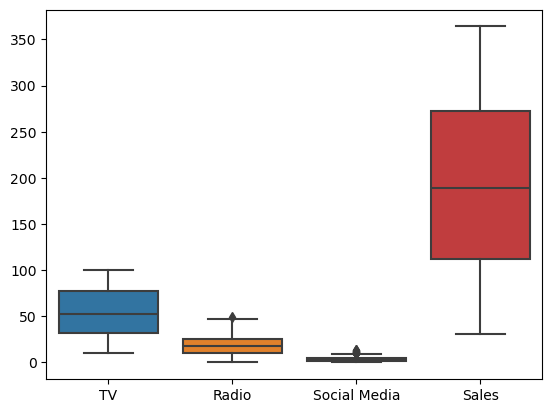

In [11]:
sns.boxplot(data = df)

<Axes: ylabel='Social Media'>

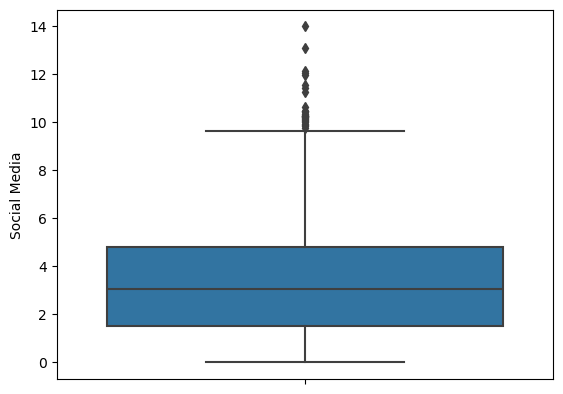

In [12]:
sns.boxplot(y = df['Social Media'])

<Axes: >

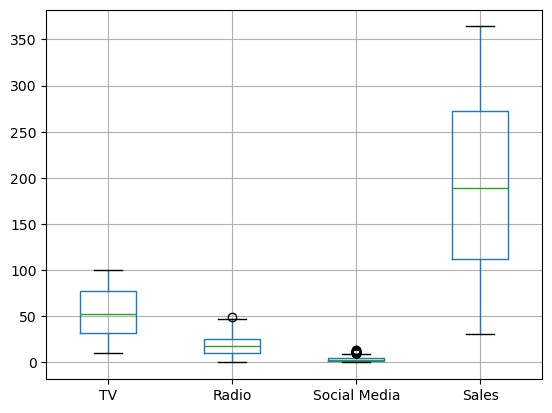

In [13]:
df.boxplot()

### 2.3 Diagnostics Analytics

In [14]:
df.groupby(df['Influencer'])['Sales'].describe()[['std', 'mean','count', 'min','max']]

,std,mean,count,min,max
Influencer,,,,,
Macro,92.386043,196.066150,1112.0,32.566825,358.420739
Mega,92.308441,190.412908,1152.0,31.402262,364.079751
Micro,94.113297,191.578370,1148.0,33.719607,362.042123
Nano,93.269894,191.708827,1134.0,31.199409,357.124573


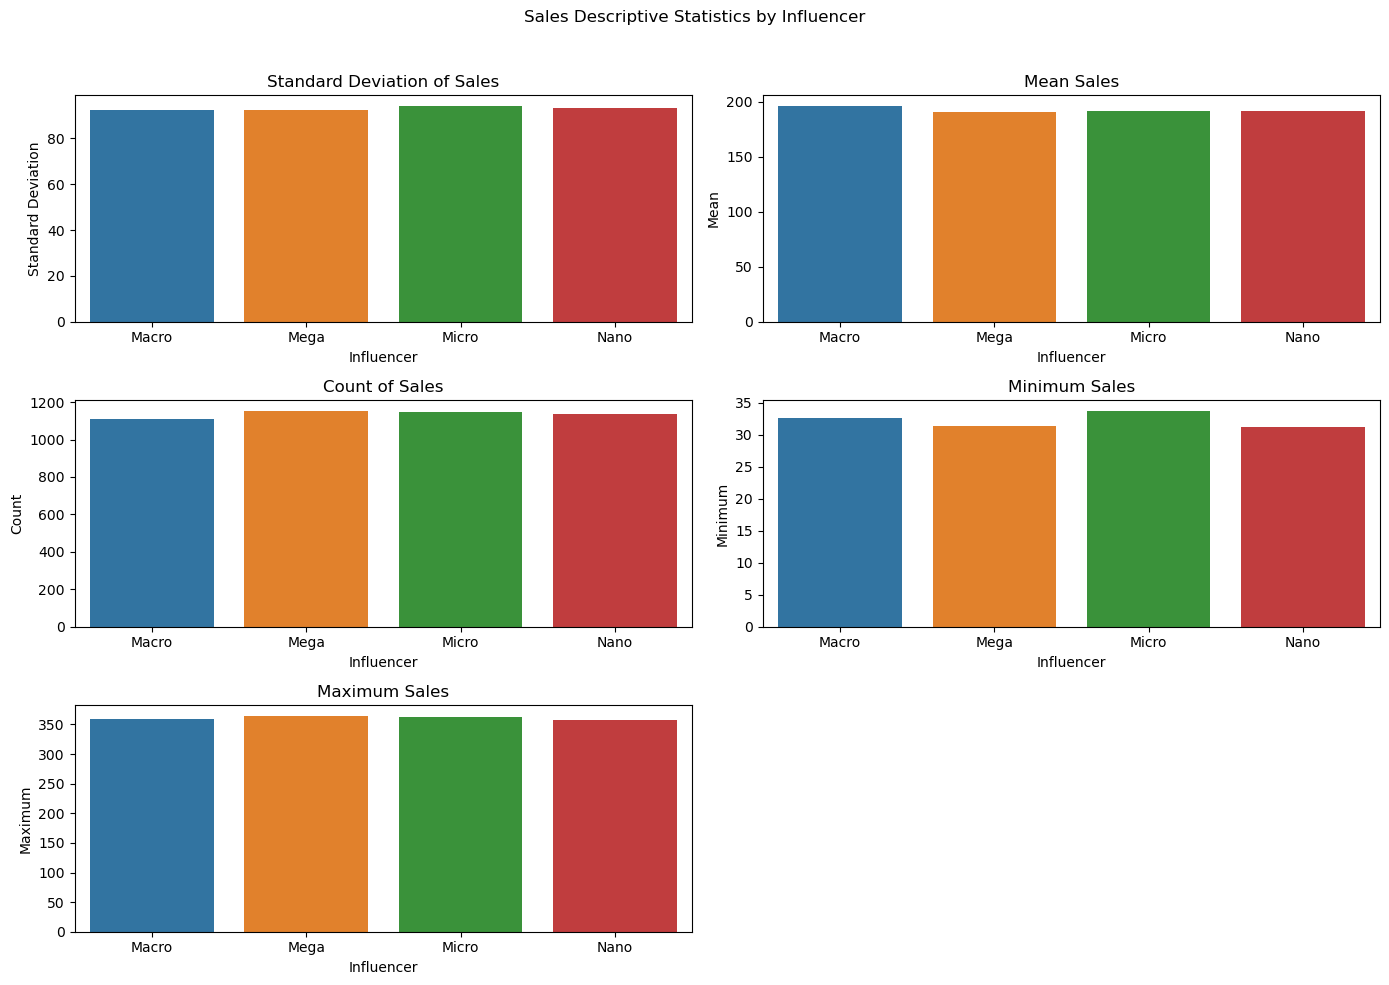

In [15]:
stats = df.groupby('Influencer')['Sales'].describe()[['std', 'mean', 'count', 'min', 'max']]

# Plotting each statistic
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))  # Adjust the size and layout as needed
fig.suptitle('Sales Descriptive Statistics by Influencer')

# Standard Deviation
sns.barplot(ax=axes[0, 0], x=stats.index, y=stats['std'])
axes[0, 0].set_title('Standard Deviation of Sales')
axes[0, 0].set_ylabel('Standard Deviation')

# Mean
sns.barplot(ax=axes[0, 1], x=stats.index, y=stats['mean'])
axes[0, 1].set_title('Mean Sales')
axes[0, 1].set_ylabel('Mean')

# Count
sns.barplot(ax=axes[1, 0], x=stats.index, y=stats['count'])
axes[1, 0].set_title('Count of Sales')
axes[1, 0].set_ylabel('Count')

# Minimum
sns.barplot(ax=axes[1, 1], x=stats.index, y=stats['min'])
axes[1, 1].set_title('Minimum Sales')
axes[1, 1].set_ylabel('Minimum')

# Maximum
sns.barplot(ax=axes[2, 0], x=stats.index, y=stats['max'])
axes[2, 0].set_title('Maximum Sales')
axes[2, 0].set_ylabel('Maximum')

axes[2, 1].remove()
# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [16]:
df.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [17]:
df.drop(columns='Influencer').columns

Index(['TV', 'Radio', 'Social Media', 'Sales'], dtype='object')

### Group columns into numerical and categorical columns

In [18]:
col_num = df.drop(columns='Influencer').columns
col_cat = ['Influencer']

In [19]:
col_num

Index(['TV', 'Radio', 'Social Media', 'Sales'], dtype='object')

### check correlation coeficient 

In [20]:
df[col_num].corr()

,TV,Radio,Social Media,Sales
TV,1.000000,0.869158,0.527687,0.999497
Radio,0.869158,1.000000,0.606338,0.868638
Social Media,0.527687,0.606338,1.000000,0.527446
Sales,0.999497,0.868638,0.527446,1.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

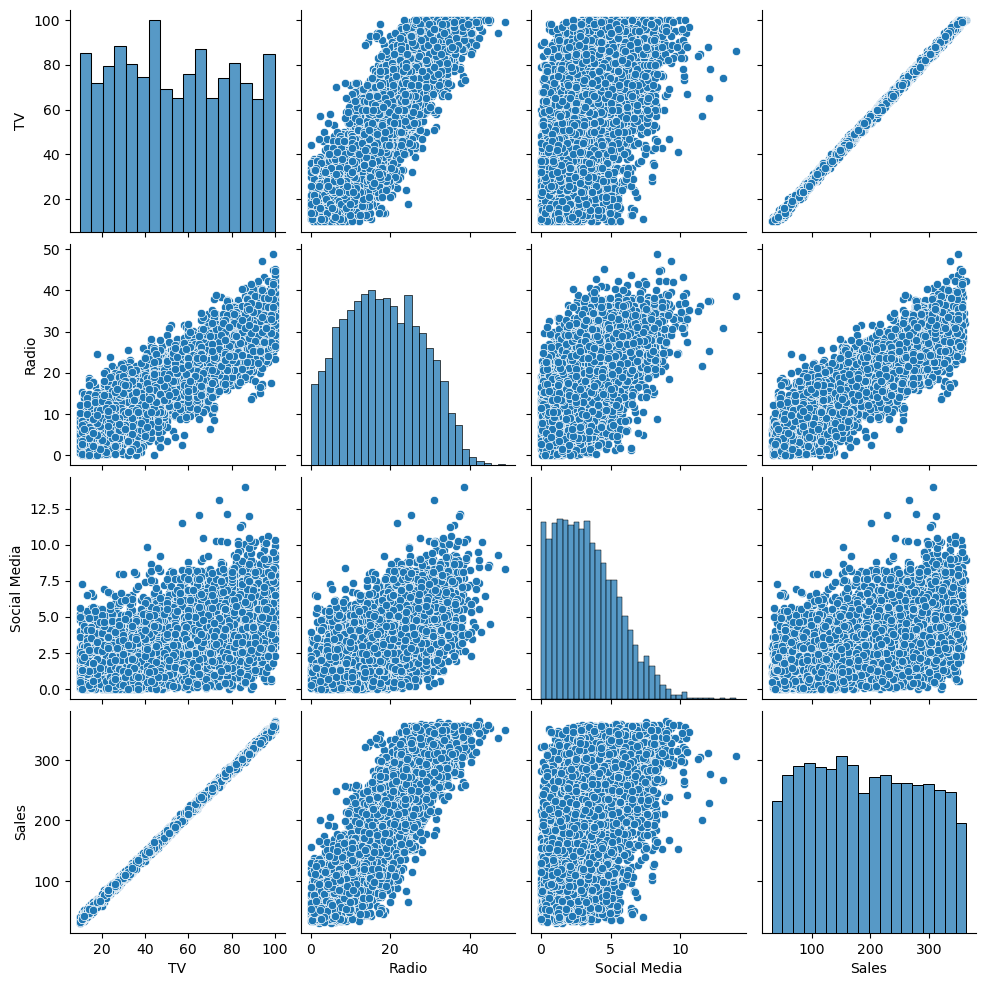

In [21]:
# fig, ax = plt.subplots(figsize = (14, 6))
sns.pairplot(df[col_num], )
# plt.savefig('pareplot.jpg', dpi = 5000);

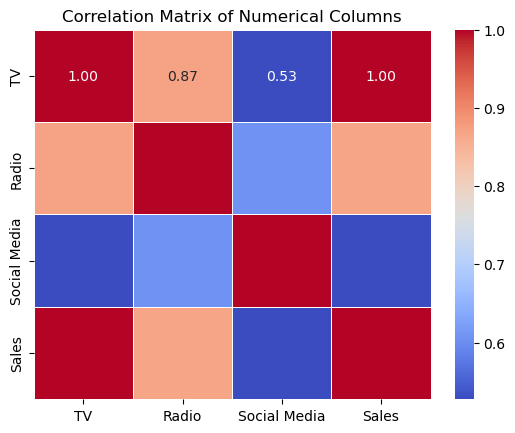

In [22]:
sns.heatmap(data=df[col_num].corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')  # Add a title to the heatmap
plt.savefig('Correlation Matrix.jpg', dpi = 5000)
plt.show()

## 3. Data preprocessing and feature engineering

### 3.1 Feature scaling

Normalization, Min_MaxScale

### 3.2 Encoding Categorical Variables

In [23]:
df['Influencer'].value_counts()

Influencer
Mega     1152
Micro    1148
Nano     1134
Macro    1112
Name: count, dtype: int64

A statistical technique called the **variance inflation factor (VIF)** can detect and measure the amount of collinearity in a multiple regression model.
- A VIF of 1 will mean that the variables are not correlated.
- A VIF between 1 and 5 shows that variables are moderately correlated.
- A VIF between 5 and 10 will mean that variables are highly correlated.

In [60]:
def VIF(x):
    vif = pd.DataFrame({
        'Features': x.columns,
        'VIF': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
    })
    vif['VIF'] = vif['VIF'].round(2)
    vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
    return vif

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df['Social Media']

In [42]:
x = df[['TV', 'Social Media']]
y = df['Sales']

In [43]:

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.2)

In [44]:
Linear1 = LinearRegression()
Linear1.fit(X_train, y_train)

LinearRegression()

In [45]:
# X_test, y_test

In [46]:
Linear1.intercept_

-0.1680370914766911

In [47]:
y_pre = Linear1.predict(X_test)

In [48]:
error = Linear1.predict(X_test)-y_test

In [49]:
error.describe()

count    910.000000
mean       0.051759
std        2.893435
min       -9.980392
25%       -1.933790
50%        0.102905
75%        2.170729
max        9.310704
Name: Sales, dtype: float64

In [50]:
X_train.isnull().sum()

TV              0
Social Media    0
dtype: int64

In [51]:
X_train.shape

(3636, 2)

In [52]:
y_train.shape

(3636,)

In [53]:
y_train.isnull().sum()

0

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error 

In [54]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard

explainer = RegressionExplainer(Linear1,X_train, y_train)
dashboard = ExplainerDashboard(explainer)

# Run the dashboard
dashboard.run()


Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.5.50.191:8050


In [59]:
from explainerdashboard import RegressionExplainer, ExplainerDashboard

# Ensure you call the reset_index() method to get a new DataFrame with the index reset
explainer = RegressionExplainer(Linear1,X_test, y_test)
dashboard = ExplainerDashboard(explainer)

# Run the dashboard
dashboard.run(port=2550)

Generating self.shap_explainer = shap.LinearExplainer(modelX)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.5.50.191:2550


Empty DataFrame
Columns: [col, contribution, value]
Index: []
Empty DataFrame
Columns: [col, contribution, value]
Index: []


In [41]:
from explainerdashboard import RegressionExplainer , ExplainerDashboard

explainer = RegressionExplainer(Linear1,)
ExplainerDashboard(explainer).run()

TypeError: RegressionExplainer.__init__() missing 1 required positional argument: 'X'

### Linear2

In [ ]:
data.drop(columns='Influencer').corr()['Sales']

In [ ]:
x1 = data.drop(columns=['Sales','Influencer'])
y1 = data.Sales

In [ ]:
X1_train, X1_test, y1_train, y1_test= train_test_split(x1, y1, random_state=1)

In [ ]:
Linear2 = LinearRegression()

In [ ]:
Linear2.fit(X1_train, y1_train)

In [ ]:
error1 = Linear2.predict(X1_test)-y1_test

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1,2 )
sns.histplot(x = error, ax = ax[0])
sns.histplot(x = error1, ax = ax[1])

In [ ]:
import statsmodels.api as sm

In [ ]:
con_x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, con_x_train).fit()

In [ ]:
model.summary()

In [ ]:
error1.describe()

## **Step 2: Data exploration** 


To get a sense of what the data includes, display the first 10 rows of the data.

In [ ]:
# Display the first 10 rows of the data.

### YOUR CODE HERE ###
data.head(10)

**Question:** What do you observe about the different variables included in the data?

The data includes the following information:
* TV promotion budget (expressed as "Low", "Medium", or "High")
* Radio promotion budget
* Social media promotion budget
* Type of influencer that the promotion is in collaboration with (expressed as "Mega", "Macro", or "Micro", or "Nano")
Note: Mega-influencers have over 1 million followers, macro-influencers have 100,000 to 1 million followers, micro-influencers have 10,000 to 100,000 followers, and nano-influencers have fewer than 10,000 followers.
* Sales accrued from the promotion

Next, to get a sense of the size of the dataset, identify the number of rows and the number of columns.

In [ ]:
# Display number of rows, number of columns.

### YOUR CODE HERE ###
data.shape

**Question:** How many rows and columns exist in the data?

* There are 572 rows and 5 columns in the data. One way to interpret this is that 572 companies are represented in the data, along with 5 aspects about each company that reveals how they promote their products/services and the sales accrued from their promotion.

Now, check for missing values in the rows of the data. This is important because missing values are not that meaningful when modeling the relationship between two variables. To do so, begin by getting Booleans that indicate whether each value in the data is missing. Then, check both columns and rows for missing values.

In [ ]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.

### YOUR CODE HERE ###
data.isna()

If you would like to read more about the `isna()` function, refer to its documentation in the references section of this lab.

In [ ]:
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.

### YOUR CODE HERE ###


If you would like to read more about the `any()` function, refer to its documentation in the references section of this lab.

In [ ]:
# Use .sum() to get the number of rows that contain missing values.

### YOUR CODE HERE ###
data.isna().any(axis=1).sum()

If you would like to read more about the `sum()` function, refer to its documentation in the references section of this lab.

**Question:** How many rows containing missing values?

* There are 3 rows containing missing values, which is not that many, considering the total number of rows. It would be appropriate to drop these rows that contain missing values to proceed with preparing the data for modeling.

Next, drop the rows that contain missing values. Data cleaning makes your data more usable for analysis and regression. Then, check to make sure that the resulting data does not contain any rows with missing values.

In [ ]:
# Use .dropna(axis=0) to indicate that you want rows which contain missing values to be dropped. To update the DataFrame, reassign it to the result.

### YOUR CODE HERE ###
data = data.dropna(axis=0)

In [ ]:
# Start with .isna() to get booleans indicating whether each value in the data is missing.
# Use .any(axis=1) to get booleans indicating whether there are any missing values along the columns in each row.
# Use .sum() to get the number of rows that contain missing values

### YOUR CODE HERE ###
data.isna().any(axis=1).sum()

The next step for this task is checking model assumptions. To explore the relationship between radio promotion budget and sales, model the relationship using linear regression. Begin by confirming whether the model assumptions for linear regression can be made in this context. 

**Note:** Some of the assumptions can be addressed before the model is built. These will be addressed in this section. After the model is built, you will finish checking the assumptions.

Create a plot of pairwise relationships in the data. This will help you visualize the relationships and check model assumptions. 

In [ ]:
# Create plot of pairwise relationships.

### YOUR CODE HERE ###
sns.pairplot(data)

**Question:** Is the assumption of linearity met?

* In the scatter plot of Sales over Radio, the points appear to cluster around a line that indicates a positive association between the two variables. Since the points cluster around a line, it seems the assumption of linearity is met.

## **Step 3: Model building** 

Select only the columns that are needed for the model.

In [ ]:
# Select relevant columns.
# Save resulting DataFrame in a separate variable to prepare for regression.

### YOUR CODE HERE ###


Now, display the first 10 rows of the new DataFrame to better understand the data.

Next, write the linear regression formula for modeling the relationship between the two variables of interest.

In [ ]:
# Write the linear regression formula.
# Save it in a variable.

### YOUR CODE HERE ###


Now, implement the ordinary least squares (OLS) approach for linear regression.

In [ ]:
# Implement OLS.

### YOUR CODE HERE ###


## **Step 4: Results and evaluation** 


Begin by getting a summary of the results from the model.

In [ ]:
# Get summary of results.

### YOUR CODE HERE ###


**R-squared (R2)** is defined as a number that tells you how well the independent variable(s) in a statistical model explain the variation in the dependent variable. It goes from 0 to 1, where 1 indicates a perfect fit of the model to the data.

Next, analyze the bottom table from the results summary. Based on the table, identify the coefficients that the model determined would generate the line of best fit. The coefficients are the y-intercept and the slope. 

**Question:** What is the y-intercept? 

**Question:** What is the slope? 

**Question:** What linear equation would you write to express the relationship between sales and radio promotion budget? Use the form of y = slope * x + y-intercept? 


**Question:** What does the slope mean in this context?

In [ ]:
# Plot the OLS data with the best fit regression line.

### YOUR CODE HERE ###
sns.regplot(x='Radio',y='Sales',data=ols_data)


**Question:** What do you observe from the preceding regression plot?

* The preceding regression plot illustrates an approximately linear relationship between the two variables along with the best fit line. This confirms the assumption of linearity.

Now, check the normality assumption. Get the residuals from the model.

In [ ]:
# Get the residuals from the model.

### YOUR CODE HERE ###


Now, visualize the distribution of the residuals.

In [ ]:
# Visualize the distribution of the residuals.

### YOUR CODE HERE ###

**Question:** Based on the visualization, what do you observe about the distribution of the residuals?

* Based on the preceding visualization, the distribution of the residuals is approximately normal. This indicates that the assumption of normality is likely met.

## **Considerations**

**What summary would you provide to stakeholders?**

* Based on the dataset at hand and the regression analysis conducted here, there is a notable relationship between radio promotion budget and sales for companies in this data, with a p-value of 0.000 and standard error of 0.194. For companies represented by this data, a 1 million dollar increase in radio promotion budget could be associated with a 8.1733 million dollar increase in sales. It would be worth continuing to promote products/services on the radio. Also, it is recommended to consider further examining the relationship between the two variables (radio promotion budget and sales) in different contexts. For example, it would help to gather more data to understand whether this relationship is different in certain industries or when promoting certain types of products/services.

**References**

[Pandas.DataFrame.Any — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html)

[Pandas.DataFrame.Isna — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isna.html)

[Pandas.Series.Sum — Pandas 1.4.3 Documentation.](https://pandas.pydata.org/docs/reference/api/pandas.Series.sum.html)

[Saragih, H.S. *Dummy Marketing and Sales Data*.](https://www.kaggle.com/datasets/harrimansaragih/dummy-advertising-and-sales-data)